In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# 박찬서님 코드에서 배운 pandas 데이터 설정 코드
pd.options.display.float_format = '{:20,.0f}'.format

In [83]:
company = pd.read_csv('company_nps_data.csv', encoding='cp949')

In [129]:
company.describe()

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
count,"99,776","99,776","99,776","99,776","99,776","99,776"
mean,"276,263","30,544,050","2,017",7,"9,736,290",38
std,"133,891","301,701,996",1,4,"43,477,779",147
min,63,300,"2,015",1,"90,000",3
25%,"165,530","1,409,955","2,016",4,"1,181,815",6
50%,"259,149","3,573,585","2,017",7,"2,334,120",11
75%,"382,651","9,592,327","2,018",10,"5,592,145",24
max,"5,159,723","11,328,779,396","2,019",12,"978,067,260","3,133"


In [130]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99776 entries, 0 to 99800
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   회사ID      99776 non-null  int64
 1   연매출액      99776 non-null  int64
 2   년도        99776 non-null  int64
 3   월         99776 non-null  int64
 4   월별_연금보험료  99776 non-null  int64
 5   월별_직원수    99776 non-null  int64
dtypes: int64(6)
memory usage: 5.3 MB


In [86]:
# 이상치 확인
np.where(company['월별_직원수'] == 0)

(array([ 4450,  6162,  7251, 12176, 20070, 33869, 39671, 49592, 54026,
        64139, 69239, 82809, 93481], dtype=int64),)

In [87]:
np.where(company['연매출액'] < 0)

(array([ 7516,  7617,  8595, 23150, 36048, 37489, 51605, 56276, 64094,
        67889, 93521, 95251], dtype=int64),)

In [ ]:
# 이상치 내용 정리
# 월별 직원수가 0으로 뜨는 경우는 세 가지이다.
# 1. 마지막 정보에서 0
# 2. 연속된 데이터 중간에 0
# 3. 기업의 전체 데이터가 0만 있음
# 1의 경우에는 기업이 문을 닫은 경우라고 판단할 수 있고, 3의 경우에는 무의미한 데이터라 판단하고 제거한다.
# 2의 경우에는 5.4 회의 중 논의가 있었고, 연속된 데이터 가운데 하나가 빠져도 무방할 것으로 얘기하고 제거한다.
# 이미 중간중간 연속된 데이터가 아닌 경우가 존재하기 때문이다.

In [88]:
# 이상치 제거
company = company.drop(index = (company.query('월별_직원수 == 0').index) | (company.query('연매출액 < 0').index))

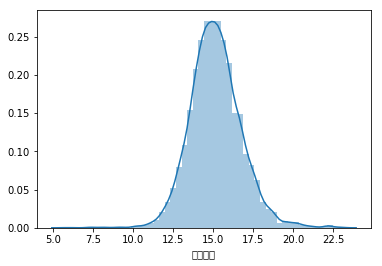

In [128]:
# 전체 기업의 연매출액 분포
company_mean_year = company.groupby(['회사ID', '년도']).agg('mean')
sns.distplot(np.log(company_mean_year['연매출액']))

In [ ]:
# 전체 기업의 연매출액을 log씌웠더니 정규성을 확인할 수 있었다.

In [92]:
# 전체 기업의 연도 
years = company[['회사ID', '년도']].drop_duplicates()

In [135]:
years['회사ID'].value_counts()

442467     5
237625     5
395238     5
296819     5
404192     5
          ..
383847     1
297829     1
1065828    1
287584     1
532360     1
Name: 회사ID, Length: 4998, dtype: int64

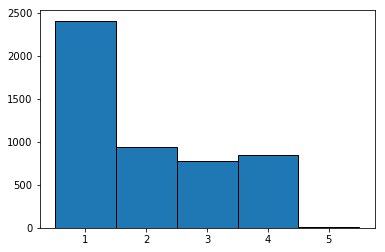

In [131]:
plt.hist(years['회사ID'].value_counts(), bins = np.arange(0,6) + 0.5, ec="k")
plt.show()

In [ ]:
# 1개년치 데이터만 있는 기업이 2409개로 전체의 절반에 가깝는 것을 확인한다.

In [ ]:
### 유니콘 기업 찾기

# 국내 유니콘 기업의 매출액을 보면 2 케이스로 나눌 수 있다.
# 1. 일정 규모의 매출액을 유지한다.
# 2. 매출액이 매년 가파른 상승세를 보인다.

# 이 때 케이스 1의 유니콘이 어떻게 일정 규모의 매출액을 낼 수 있을지 추론해보면 다음과 같다.
# 1) 초반에는 케이스 2의 기업들처럼 성장했을 것이다.
# 2) 엄청난 히트상품을 만들어 단기간에 엄청한 매출액을 썼다. (예 : 크래프톤의 배그, 지피클럽의 꿀광마스크)

# 여기서 2)의 경우, 즉 현 시점에서는 매출액이 적어도 미래에는 히트 상품을 낼 기업을 찾아내는 것은 주어진 데이터로 파악하기에 한계가 있다고 느낀다. 
# 따라서 가파른 매출액 상승세를 보이는 기업이 유니콘이 될 수 있다고 가정한다.
# 또한 연간 매출액 상승률을 고려하기 때문에 위에서 살펴본 1개년치 데이터만 있는 기업은 유니콘 선정 대상에서 제외한다.


# 유니콘 기업은 다음과 같이 가정한다.

# 1. 매출액이 천억 이상이다.
#  > 옐로모바일 제외 국내 10개 유니콘 기업 중 에이프로젠을 제외하면 모든 기업이 매출액 천억을 달성한 바 있다.
# 2. 연간 매출 성장률이 높다.
#  > 5.4 회의 중에도 합의된 내용이지만 높은 성장률 또한 매출액 천억과 더불어 유니콘 기업의 특성이라고 판단한다.
# 3. 적정 규모의 직원 수를 가지고 있다.


In [146]:
years_series = years['회사ID'].value_counts()

In [148]:
company_year_count = pd.DataFrame({'회사ID':years_series.index, 'year_count':years_series.values})
company_year_count

,회사ID,year_count
0,442467,5
1,237625,5
2,395238,5
3,296819,5
4,404192,5
...,...,...
4993,383847,1
4994,297829,1
4995,1065828,1
4996,287584,1


In [151]:
company2 = pd.merge(company, company_year_count, left_on = '회사ID', right_on = '회사ID', how='left')
company2

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수,year_count
0,233757,41688077,2018,7,8912380,36,4
1,123464,1760695,2018,3,942380,5,3
2,342124,3221341,2018,7,781180,4,2
3,386420,4815584,2015,11,3795900,14,4
4,129243,9799736,2018,10,40724680,151,4
...,...,...,...,...,...,...,...
99771,171439,4630622,2017,2,2402740,11,4
99772,239388,1045021,2018,10,1428800,9,1
99773,272304,181898,2018,3,392560,4,1
99774,362194,2100218,2018,12,874780,3,4


In [158]:
numb = company2[company2['year_count'] == 1].index
numb
company3 = company2.drop(numb)

In [165]:
company3 = company3.drop('year_count', axis = 1)
company3

,회사ID,연매출액,년도,월,월별_연금보험료,월별_직원수
0,233757,41688077,2018,7,8912380,36
1,123464,1760695,2018,3,942380,5
2,342124,3221341,2018,7,781180,4
3,386420,4815584,2015,11,3795900,14
4,129243,9799736,2018,10,40724680,151
...,...,...,...,...,...,...
99769,466886,119791,2018,2,336220,4
99770,150135,7119441,2016,12,4872520,25
99771,171439,4630622,2017,2,2402740,11
99774,362194,2100218,2018,12,874780,3


In [176]:
sales_ROR = company3[['회사ID', '년도', '연매출액']].drop_duplicates()
sales_ROR = sales_ROR.sort_values(['회사ID', '년도'])
sales_ROR

,회사ID,년도,연매출액
19581,14271,2015,1199495
4502,14271,2016,4257715
8563,14271,2017,5005248
11968,14271,2018,8388401
6454,14271,2019,9039340
...,...,...,...
5053,516653,2016,1745520
10631,516653,2017,1956460
1653,516653,2018,1500046
5278,620445,2018,1953553


In [221]:
sales_ROR['평균연매출상승률'] =  (sales_ROR['연매출액'] / sales_ROR.sort_values(by = ['회사ID', '년도'], ascending = True).groupby('회사ID')['연매출액'].shift(1) - 1) * 100
sales_ROR.head(20)

,회사ID,년도,연매출액,연매출상승률,평균연매출상승률
19581,14271,2015,1199495,nan,nan
4502,14271,2016,4257715,255,255
8563,14271,2017,5005248,18,18
11968,14271,2018,8388401,68,68
6454,14271,2019,9039340,8,8
4741,44851,2016,939238,nan,nan
10677,44851,2018,1189946,27,27
51764,59533,2015,194704,nan,nan
13003,59533,2016,207762,7,7
3367,59533,2017,124299,-40,-40


In [222]:
sales_ROR2 = sales_ROR.dropna()
sales_ROR3 = sales_ROR2[['평균연매출상승률']].groupby(sales_ROR2['회사ID']).mean()

In [223]:
company_fit = pd.merge(company3, sales_ROR3, left_on = '회사ID', right_on = '회사ID', how='left')

In [227]:
company_fit2 = company_fit[(company_fit['연매출액'] > 100000000) & ((company_fit['월별_직원수']) > 10) & ((company_fit['월별_직원수']) < 1500)]

In [241]:
company_fit3 = company_fit2[['회사ID', '평균연매출상승률']].drop_duplicates()
company_fit3.sort_values(by = ['평균연매출상승률'], axis = 0, ascending = False).head(10)

,회사ID,평균연매출상승률
1435,294620,476
3228,403470,83
2028,127366,62
17932,420165,48
841,231703,44
7212,294337,41
2615,294790,41
4347,428817,37
5152,469677,31
563,420046,24


In [ ]:
# 조건에 만족하는 상위 10개 기업을 추려보면 다음과 같다.